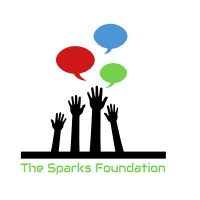

# The Sparks Foundation: Data Science & Business Analytics Internship

## Task 1 : Prediction using Supervised ML

### Author: Sudheer N Poojary
### Problem statement :
What will be predicted score if a student studies for 9.25 hrs/ day?



### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. Using stats model and ScikitpLearn library can be used to implement the regression function.This is a simple linear regression task as it involves just two variables.


- Reading and Understanding the data
- Training the data
- Residual analysis
- Predicting and evaluating on the test set

In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# Model building libraries
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

 ## 1. Reading and Understanding the Data

In [3]:
# Reading the csv file and putting it into 'df' object.
df=pd.read_csv("student_scores.csv")
df.shape

(25, 2)

### Inspecting the Dataset

In [4]:
#checking the null values in data set
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#checking data type of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Viewing the statistcal details 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 2. Exploratory Data Analysis

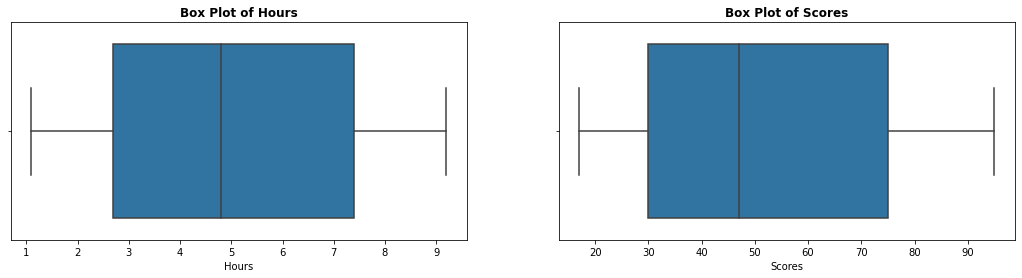

In [7]:
# Univariate analysis
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours', data = df)
plt.title('Box Plot of Hours', fontweight = 'bold')
plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = df)
plt.title('Box Plot of Scores',fontweight = 'bold')

plt.show()

#### Insights:

There are no outliers present in the two columns

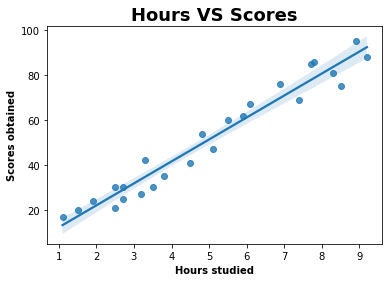

In [8]:
#Bivariate Analysis

sns.regplot(x="Hours",y="Scores",data=df)
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Hours VS Scores', fontweight = 'bold', fontsize = 18)
plt.show()

#### Insights:

Hours and score do have a linear relationship between them. Hence we can go ahead and perform linear Regression for this dataset.

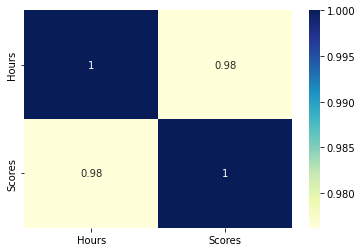

In [9]:
# Checking correaltion factor between the two column
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Insights:
Hours and Score is highly positively correlated with a correlation factor of 0.98

## 3. Test Train Split 

Steps:
- Create X and Y
- Create train and test sets (70-30, 80-20)
- Train your model on the train set (i.e learn the coefficients)
- Evaluate the model (training set, test set)

In [10]:
# Create X and Y sets
X=df['Hours']
y=df['Scores']

In [11]:
# Performing test train split with 70-30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [12]:
# Checking the shapes for all the sets
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (17,)
X_test:  (8,)
y_train:  (17,)
y_test:  (8,)


### Training the model with stats function

In [13]:
# Adding Constant
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,Hours
6,1.0,9.2
12,1.0,4.5
4,1.0,3.5
24,1.0,7.8
0,1.0,2.5


In [14]:
# Fitting the model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    1.495142
Hours    9.871714
dtype: float64

In [15]:
# Printing the model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.15e-11
Time:                        08:56:11   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

### Validating Linear Regression assumptions

In [16]:
y_train_pred=lr_model.predict(X_train_sm)

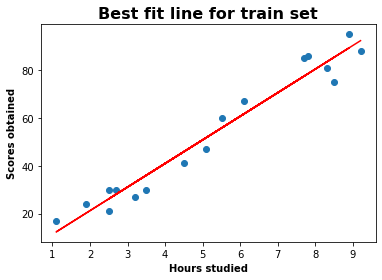

In [17]:
#Visualizing the fit on the train set

plt.scatter(X_train, y_train)
plt.plot(X_train,y_train_pred, "r")
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best fit line for train set', fontweight = 'bold', fontsize = 16)
#plt.plot(X_train,1.4951+9.8717*X_train, "r")
plt.show()

## 4. Residual Analysis

In [18]:
# error = f(y_train, y_train_pred)  
res = y_train - y_train_pred
res.head()

6    -4.314915
12   -4.917857
4    -6.046143
24    7.505485
0    -5.174428
dtype: float64

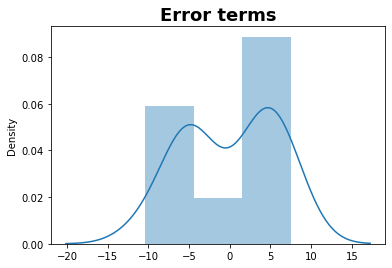

In [19]:
#Plot the residuals
plt.figure()
sns.distplot(res)
plt.title('Error terms',fontweight = 'bold', fontsize = 18)
plt.show()

#### Insights:
It can be seen that the error terms are normally distributed with mean 0. Hence validated one of the assumptions of Linear Regression    

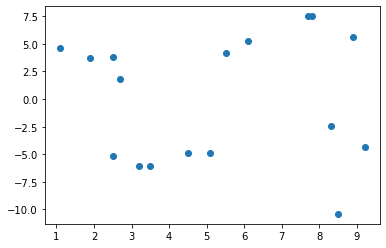

In [20]:
#Plotting scatter plot to chech res
plt.scatter(X_train,res)
plt.show()

#### Insights:
Error terms/ residuals dont tend to follow any particular pattern as such. They seem to be distributed randomly

## 5. Predictions and Evaluation on the test set

In [21]:
#  make Predictions on the test set (y_test_pred)
#  Evaluate the model, r_squared, on the test

In [22]:
# add a cons/intercept to test
X_test_sm=sm.add_constant(X_test)
# pred on test
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
19    74.545829
23    69.609972
21    48.879371
dtype: float64

In [23]:
#  Evaluate the model, r_squared, on the test
#r2 on Test
r2=r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_score of test set using stats model: ', (r2)*100)

#r2 on Train
r2=r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_score of train set using stats model: ', (r2)*100)

R2_score of test set using stats model:  93.09458862687438
R2_score of train set using stats model:  95.70735354094693


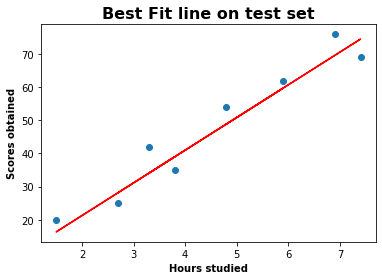

In [24]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best Fit line on test set', fontweight = 'bold', fontsize = 16)
plt.show()

# Liner Regression Using Sklearn Function

In [25]:
# train test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [26]:
# Reshaping the X train and X test set
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)
X_train_lm.shape

(17, 1)

In [27]:
# steps in sklearn model building
from sklearn.linear_model import LinearRegression

#1. create the object of liner regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [28]:
#3. see the params, make predictions (train,test)
print(lm.coef_)
print(lm.intercept_)

[9.87171443]
1.495142109236383


In [29]:
# make prediction
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [30]:
#4.evaluate the model(r2, etc.)
print('R2_score of train set using SK Learn model: ',r2_score(y_true=y_train, y_pred=y_train_pred)*100)
print('R2_score of test set using SK Learn model: ',r2_score(y_true=y_test, y_pred=y_test_pred)*100)

R2_score of train set using SK Learn model:  95.70735354094693
R2_score of test set using SK Learn model:  93.09458862687437


#### Insights:
In summary, the R-square value for the training set was 95.7%, while for the test set it was 93.09%, which is deemed acceptable. Therefore, the model has performed well and has successfully generalized the data. Moving forward, we will proceed to deploy the model to make predictions for our problem statement.

### Problem statement: What will be the predicted score if a student studies for 9.25hrs/day?

In [31]:
#predicting the student score using our liner regression model.

hours = [[9.25]]
print('Predicted Student Score :{}'.format(lm.predict(hours)[0]))

Predicted Student Score :92.80850057353504


####  How did the model get the predicted score as 92.90% for a student who studied for 9.25 hrs/day? Let's break it down step by step.

As per Linear regression,
y = mx + c

where,
x: Independent variable (i.e. Input),
y: Dependent variable (i.e. Output),
m: Coefficient of the independent variable,
c: Intercept.

From Model, we got coefficient value: 9.87171443 and intercept value: 1.495142109236383 and x value: 9.25

In [32]:
# This calculation shows the process through which I obtained the predicted score
y=9.87171443*9.25+1.495142109236383
print("If a student studies for 9.25 hours per day, the model predicts that their score would be approximately {}".format(y))

If a student studies for 9.25 hours per day, the model predicts that their score would be approximately 92.80850058673639


### Thanks for reviewing my code!!